### 応用問題2 (ヘモグロビンの飽和曲線)
データファイル(p2.csv) に酸素分圧(mmHg)とヘモグロビンの酸素飽和度(%)のデータがある。

(1) データを散布図でプロットする。

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from numpy import log, exp
from scipy.stats import linregress 

In [12]:
df = pd.read_csv('p2.csv')
df.head()

,P[mmHg],飽和度[%]
0,3.08,2.21
1,4.61,3.59
2,6.77,6.08
3,10.15,10.50
4,12.31,14.09


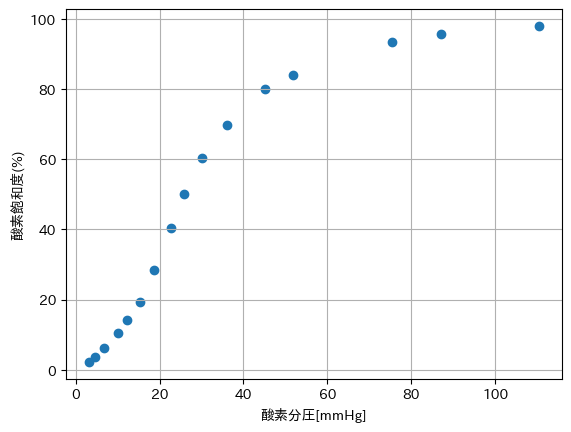

In [13]:
x = df.iloc[:,0]
y = df.iloc[:,1]
plt.scatter(x, y)
plt.xlabel('酸素分圧[mmHg]')
plt.ylabel('酸素飽和度(%)')
plt.grid()
plt.show()


Hillの式
$$
y = 100 \frac{ax^n}{1+ax^n}
$$
で近似して$a, n$の値データから求めたい。曲線のままでは非線形回帰が必要だが、この関数はロジット変換をすることで、直線になる。
$$
\ln{\frac{y}{100-y}} = n\ln{x} + \ln{a}
$$
$X = \ln{x}, Y = \ln{\frac{y}{100-y}}$ とおくと、
$Y = nX + \ln{a}$ となり、傾き$n$, y切片$\ln{a}$の直線を表す。

$X, Y$の関係をプロットせよ。


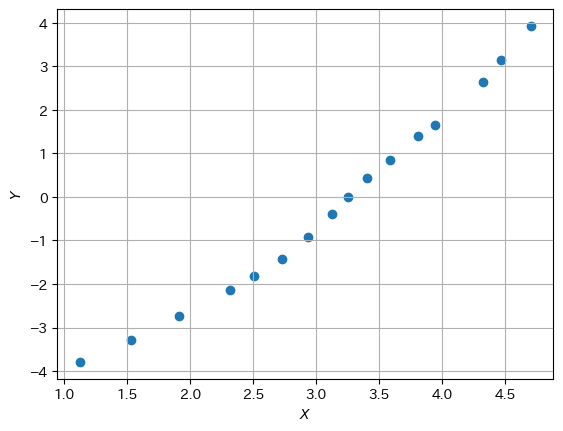

In [16]:
X = log(x)
Y = log(y/(100-y))
plt.scatter(X, Y)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.grid()
plt.show()

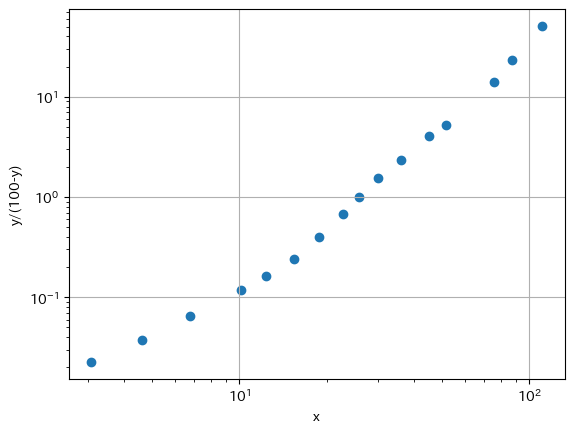

In [36]:
# 変数変換で対数を取らずに両対数グラフにしても同じ形であるが、線形回帰したいので対数を取る
X1 = x 
Y1 = y/(100-y)
plt.scatter(X1, Y1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y/(100-y)')
plt.grid()
plt.show()

LinregressResult(slope=2.1988155969989296, intercept=-6.981813211952907, rvalue=0.9893638580007056, pvalue=4.0148998214238437e-13, stderr=0.08640083208165884, intercept_stderr=0.2821764493434352)
2.1988155969989296 0.0009286178946895807


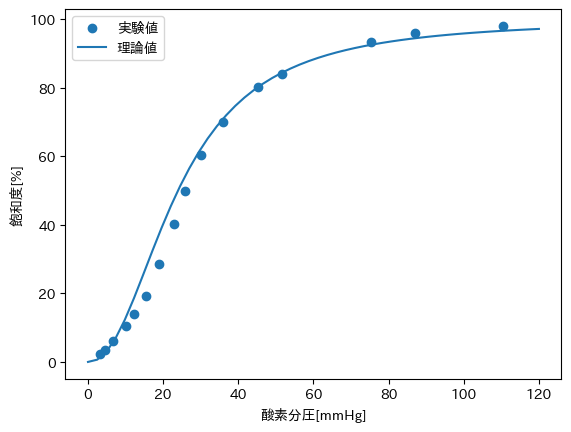

In [35]:
lr = linregress(X, Y)
print(lr)
n = lr.slope
lna = lr.intercept
a = exp(lna)
print(n, a)
xth = np.linspace(0, 120)
yth = 100*a*xth**n/(1+a*xth**n)
plt.scatter(x, y, label='実験値')
plt.plot(xth, yth, label='理論値')
plt.xlabel('酸素分圧[mmHg]')
plt.ylabel('飽和度[%]')
plt.legend()
plt.show()

LinregressResult(slope=2.4417434243213822, intercept=-7.95767185094611, rvalue=0.9976497695246342, pvalue=1.3310504377590744e-10, stderr=0.05929141681128257, intercept_stderr=0.18994078961727207)


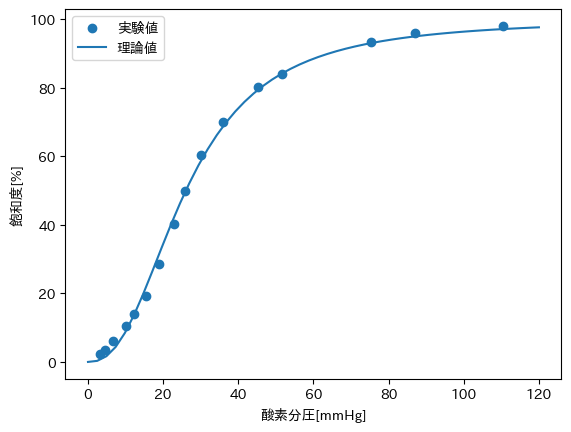

In [34]:
# XYのグラフで直線がよい近似となるのは中間部なので、最初と最後の3点を除外して近似してみる
lr1 = linregress(X[3:-3], Y[3:-3])
print(lr1)
n1 = lr1.slope
a1 = exp(lr1.intercept)
y1 = 100*a1*xth**n1/(1+a1*xth**n1)
plt.scatter(x, y, label='実験値')
plt.plot(xth, y1, label='理論値')
plt.xlabel('酸素分圧[mmHg]')
plt.ylabel('飽和度[%]')
plt.legend()
plt.show()
# このようにすると酸素分圧20mmHgあたりのずれが改善した。